# Apertures

What is an aperture and what does it have to do with fourier transforms!

The picture below is the basic idea of a camera.  its a box with a hole.

The first camera was actually a cave in Italy (or maybe China).

https://en.wikipedia.org/wiki/Camera_obscura
https://www.britannica.com/technology/camera-obscura-photography

The hole lets in light which is reflected off the object.  The rays travel from the object and pass through the aperture.  An upside down, and left to right reflected, version of the object appears.



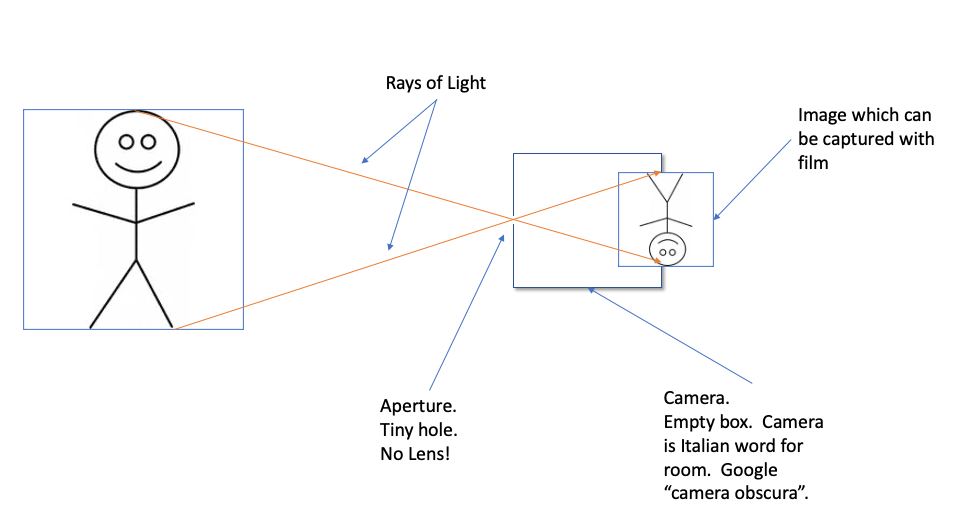

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import PIL # image library to read JPG

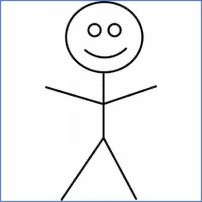

In [2]:
stick = PIL.Image.open("stick.jpg")
stick # cool jupyter can just display the image!

In [3]:
stick_np = np.array(stick)
stick_np.shape  

# The image has THREE dimensions.  Its RGB (color) (i, j, channel)

(202, 202, 3)

In [4]:
# Its a black and white, so RGB are all the same.  Let's grab on.
stick_np = np.array(stick)[:, :, 1]
stick_np.shape

(202, 202)

<IPython.core.display.Javascript object>


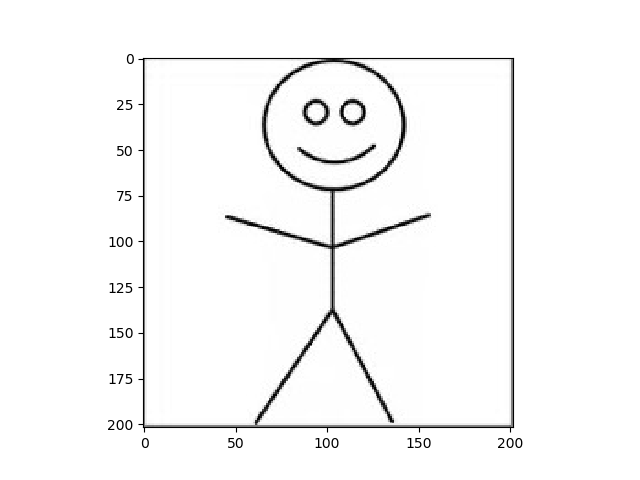

In [5]:
plt.figure()
plt.imshow(stick_np, cmap='gray')

<IPython.core.display.Javascript object>


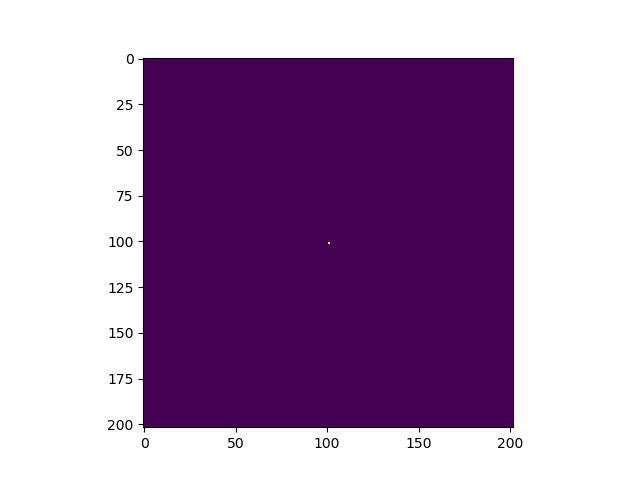

In [6]:
# Let's make an aperture!
aperture = np.zeros(stick_np.shape)
# Just one pixel wide
aperture[101, 101] = 1
plt.figure()
plt.imshow(aperture)

<IPython.core.display.Javascript object>


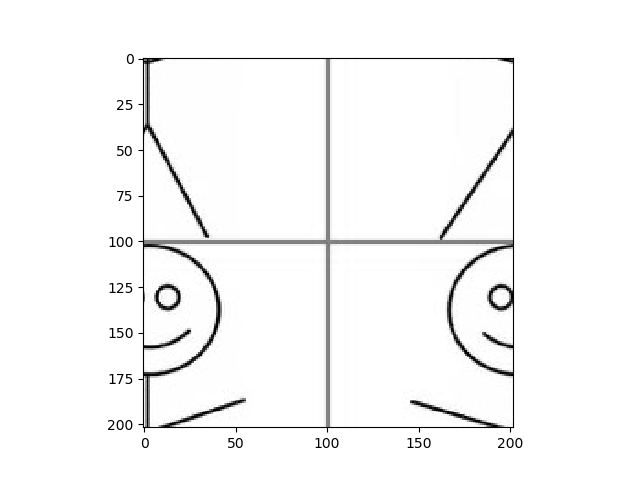

In [7]:
# We can "LOOK" at the object (mister stick man) through this tiny aperture.

# First using fft.
cam1 = np.fft.ifft2(np.fft.fft2(stick_np) * np.fft.fft2(aperture))
plt.figure()
# Note this would not work... because using FFT makes the image complex
# plt.imshow(cam1)
plt.imshow(np.absolute(cam1), cmap='gray')

## OK, what just happened?

The "camera" should have seen the object and made an image.  It did sort of did, but everything is shifted... actually more like "rotated".

Well remember fftshift.  Something similar is going on.

Fourier transforms assume that the image wraps around at the edges.  So when it is shifted to the right and down, stuff from the left wraps around.

Folks generally call this rotation.

Also, the image has a black border.  Its not visible until it got shifted like this.  We'll see it again later.

In [8]:
# Let's make an aperture!  But this time, we'll shift the aperture to the upper left!
aperture = np.zeros(stick_np.shape)
# Just one pixel wide, but now 
aperture[0, 0] = 1

<IPython.core.display.Javascript object>


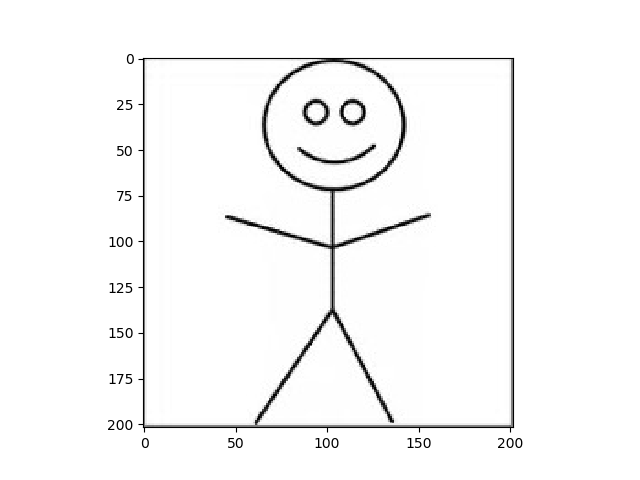

In [9]:
cam1 = np.fft.ifft2(np.fft.fft2(stick_np) * np.fft.fft2(aperture))
plt.figure()
plt.imshow(np.absolute(cam1), cmap='gray')

**That worked!!**

But what happens if we make the aperture larger?

First off, why make it larger?  Because then it can let in more light.  Note, we have not added lenses, which also let in more light.  

Now the image is brighter, and you can see things which are dimmer.

But the light gets all mixed together, so you can get a blurrier image.

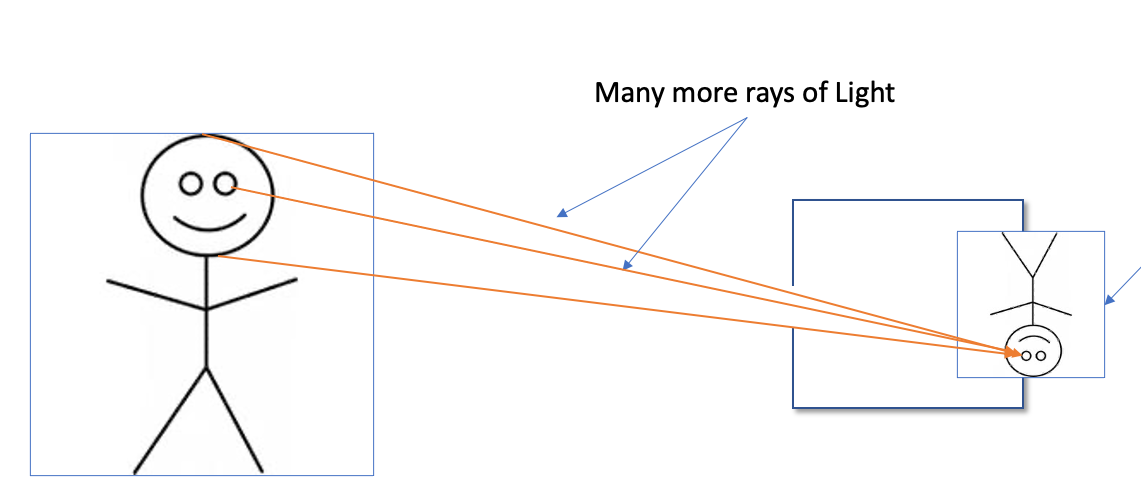

<IPython.core.display.Javascript object>


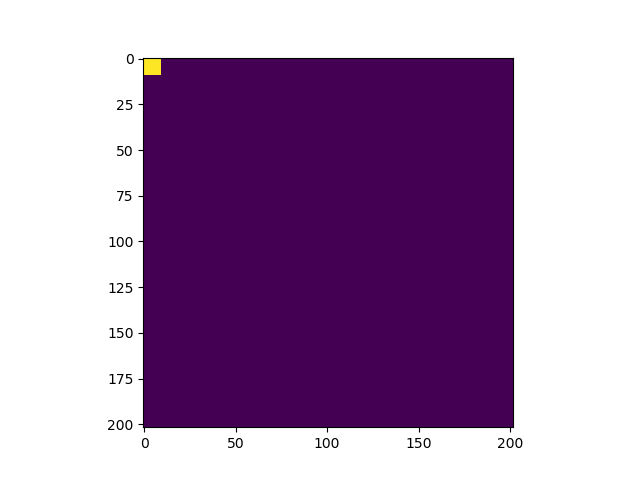

In [10]:
# Let's make an aperture!
aperture = np.zeros(stick_np.shape)
# 10 by 10 pixels wide
aperture[0:10, 0:10] = 1
plt.figure()
plt.imshow(aperture)

<IPython.core.display.Javascript object>


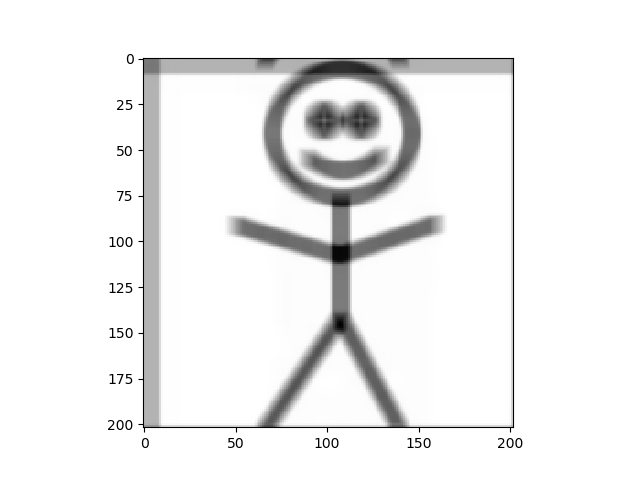

In [11]:
cam1 = np.fft.ifft2(np.fft.fft2(stick_np) * np.fft.fft2(aperture))
plt.figure()
plt.imshow(np.absolute(cam1), cmap='gray')

<IPython.core.display.Javascript object>


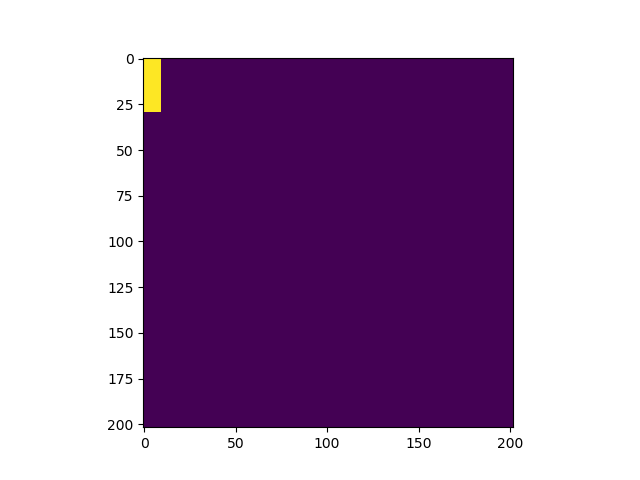

In [13]:
# Now our image is blurry!


# Note we can "see" the aperture in the image.

aperture = np.zeros(stick_np.shape)
# 30 by 10 pixels wide
aperture[0:30, 0:10] = 1
plt.figure()
plt.imshow(aperture)


<IPython.core.display.Javascript object>


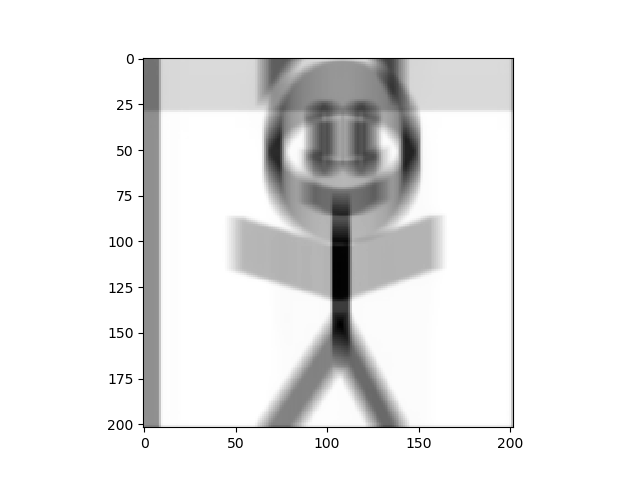

In [14]:
cam1 = np.fft.ifft2(np.fft.fft2(stick_np) * np.fft.fft2(aperture))
plt.figure()
plt.imshow(np.absolute(cam1), cmap='gray')

# Note the effect of the border is more pronounced now.